In [2]:
import tweepy

consumer_key = 'XRtIm1Mnhk3ktpacwMzeGz1V0'
consumer_secret = 'kQoQpgLNsgGJ5VBPEqs3II92BvjeriXOdLWAVoeoY84t30TNgE'
access_token = '1633497956-vgq9BrDZmihmPPHexldU9oObEchUbhbChonPwYu'
access_token_secret = 'mFA16Mz93Iz4WTcoADchemO8lzPC4SB1fgaamWejkohVA'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

#Comprobar que funciona la api
status = api.get_status('937349434668498944')
print(status.user.id)
user = api.get_user(status.user.id).screen_name
api.get_user('Humbert18960727').created_at

4219197432


datetime.datetime(2016, 1, 6, 16, 42, 23)

In [3]:
import time
import tweepy
import pandas as pd
import matplotlib.pyplot as plt

def get_tweet_status(tweet_id):
    '''
    Devuelve un objeto status con todos los datos de un tweet
    '''
    try:
        return api.get_status(tweet_id)
    except tweepy.TweepError as e:
        return 'SuspendedAccount'

def get_user_by_id(id):
    '''
    Devuelve un objeto user a traves del id del user
    '''
    return api.get_user(id)

def get_screen_name(id):
    try:
        user = get_user_by_id(id)
        screen_name = user.screen_name
        return screen_name
    except tweepy.TweepError as e:
        return ('SuspendedAccount')    
    
def get_screen_name_from_tweet(tweet_id):
    try:
        status = api.get_status(tweet_id)
        user = get_user_by_id(status.user.id)
        screen_name = user.screen_name
        return screen_name
    except tweepy.TweepError as e:
        return ('SuspendedAccount')    

def get_followers_page(screen_name):
    '''
    Devuelve los ids de los usuarios que sigue un user, screen_name es el nombre de usuario sin el '@'
    ej @NelsonMandela -> NelsonMandela
    '''
    ids = []
    for page in tweepy.Cursor(api.followers_ids, screen_name=screen_name).pages():
        ids.extend(page)
        #time.sleep(60)
    return ids



def get_followers_limited(screen_name, total):
    '''
    Devuelve los ids de los usuarios que sigue un user, screen_name es el nombre de usuario sin el '@'
    ej @NelsonMandela -> NelsonMandela
    Obtiene solo un numero de ids de usuarios indicado en el parametro total
    '''
    ids = []
    for page in tweepy.Cursor(api.followers_ids, screen_name=screen_name).items(total):
        ids.append(page)
    return ids

def get_followers_from_tweet_id(tweet_id, total = 0):
    '''
    Pasandole el id de un tweet obtenemos todos sus seguidores,
    se le puede pasar el parametro total y obtener solamente un numero concreto de ids
    '''
    user_id = get_tweet_status(tweet_id).user.id
    screen_name = get_user_by_id(user_id).screen_name
    if total == 0:
        followers_ids = get_followers_page(screen_name)
    else:
        followers_ids = get_followers_limited(screen_name,total)
    return followers_ids
    
    

def get_tweets(num_noticias):
    '''
    Le pasamos el numero de noticias de las cuales queremos obtener los tweets_ids
    Con el DataFrame de Pandas separamos los tweets de una misma noticia
    Devuelve un array de [titulos, array(tweets_ids)]
    '''
    df = pd.read_csv('./data/politifact_fake.csv') 
    #Esto se puede cambiar por otro dataset (ej: ./data/politifact_real.csv), pero de momento trabajamos con este
    df['tweet_ids'][0].split('\t')
    
    titulo = []
    tweets = []
    i = 0
    
    for tweet in df['tweet_ids']:
        if i < num_noticias:
            array_tweets = str(tweet).split('\t')
            #Se puede cambiar a que tenga al menos 5 o 10 tweets para probar
            if(len(array_tweets) > 1 and len(array_tweets) < 2000): #Solo si tiene algun tweet lo añadimos, 1 elemento es NaN
                tweets.append(array_tweets)
                titulo.append(df['title'][i])
                i = i+1
    noticias = [titulo, tweets]
    return noticias 

In [3]:
import numpy as np
#Ejemplos de prueba
print(get_screen_name_from_tweet('937349434668498944'))
print(get_tweet_status('937349434668498944').user.id)
print(get_user_by_id('4219197432').screen_name)
print(get_followers_limited('OfeliasHeaven',10))
#print(get_followers_from_tweet_id('937349434668498944')
noticias = get_tweets(10)
print("Noticia: ", noticias[0][0],"\nTweet: ",noticias[1][0][0]) #Primer tweet de la primera noticias

OfeliasHeaven
4219197432
OfeliasHeaven
[29036789, 1425690121, 1208256837889482752, 1159961359, 551281483, 438051989, 730820197939093504, 404472897, 993614707222294528, 27443191]
Noticia:  BREAKING: First NFL Team Declares Bankruptcy Over Kneeling Thugs 
Tweet:  937349434668498944


94683
Num Maximo de Tweets: 1915 | Noticia Nº:  366
Nº Noticias en rangos de 200: [239.  51.  22.  22.   6.  18.   3.   3.   1.   2.]


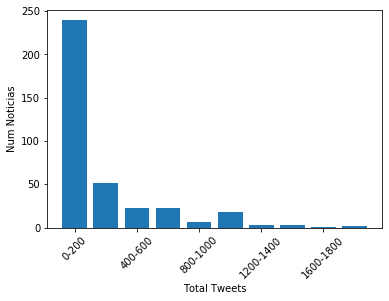

In [4]:
noticias = get_tweets(num_noticias=367)
total_tweets = 0
max_tweet = 0
number = 0
arrayPlot = np.zeros(10)
for i in range(len(noticias[1])):
    total_tweets = total_tweets + len(noticias[1][i])
    arrayPlot[len(noticias[1][i]) // 200] += 1
    if(max_tweet < len(noticias[1][i])):
        max_tweet = len(noticias[1][i])
        number = i                
print(total_tweets)
print("Num Maximo de Tweets:", max_tweet, "| Noticia Nº: ", i)
print("Nº Noticias en rangos de 200:",arrayPlot)

plt.bar(range(10),arrayPlot)
plt.xticks(range(0,10,2), ['0-200','400-600','800-1000','1200-1400','1600-1800'],rotation=45)
plt.ylabel("Num Noticias")
plt.xlabel("Total Tweets")
plt.show()

Vemos que la mayoria de noticias no supera los 200 twits, y que muy pocas noticias han tenido muchos twits

##### Intento de sacar aristas
(No es correcto)

In [5]:
df = pd.read_csv('./gen/nodos/nodos_1noticias.csv')
df = df[df.name != 'SuspendedAccount']
edgesDict = {}

for i, screen_name in enumerate(df['name']):
    followers = [1,2,3]
    #followers = get_followers_limited(screen_name,100)
    if i % 2 == 0:
        followers = ["A", 'b', 'd', '1']
    if i % 10 == 0:
        followers = ["A", 'b', 'd', '1', 'd', 'f','t', 'r', 'u']
    edgesDict[screen_name] = followers
    
edges = pd.DataFrame.from_dict(edgesDict,orient='index')
edges.rename( columns={'Unnamed: 0':'new column name'}, inplace=True )
print(edges.head())
edges.to_csv('./output/pruebas/prueba.csv')

edgesTest = pd.read_csv('./output/pruebas/prueba.csv')
edgesTest.rename( columns={'Unnamed: 0':'screen_name'}, inplace=True )
edgesTest.head(10)

                 0  1  2     3     4     5     6     7     8
OfeliasHeaven    A  b  d     1     d     f     t     r     u
lorn_cramer      1  2  3  None  None  None  None  None  None
lupash7          A  b  d     1  None  None  None  None  None
yojudenz         1  2  3  None  None  None  None  None  None
WilliamNerbonne  A  b  d     1  None  None  None  None  None


,screen_name,0,1,2,3,4,5,6,7,8
0,OfeliasHeaven,A,b,d,1.0,d,f,t,r,u
1,lorn_cramer,1,2,3,NaN,NaN,NaN,NaN,NaN,NaN
2,lupash7,A,b,d,1.0,NaN,NaN,NaN,NaN,NaN
3,yojudenz,1,2,3,NaN,NaN,NaN,NaN,NaN,NaN
4,WilliamNerbonne,A,b,d,1.0,NaN,NaN,NaN,NaN,NaN
5,saveusrepublic2,1,2,3,NaN,NaN,NaN,NaN,NaN,NaN
6,starchaser57,A,b,d,1.0,NaN,NaN,NaN,NaN,NaN
7,Ettan1945,1,2,3,NaN,NaN,NaN,NaN,NaN,NaN
8,ThePipeStore,A,b,d,1.0,NaN,NaN,NaN,NaN,NaN
9,bronwyn1140,1,2,3,NaN,NaN,NaN,NaN,NaN,NaN


Despues de generar los csv de los usuarios y seguidores,
Generamos una lista de adyacencia que se importa correctamente en Gephi

El formato de esto sera:
source, target, target, ... , target

Ej:
OfeliasHeaven, 468544, 891484, 57847894 

De esta manera podemos importar directamente el archivo sin que nos de problemas

In [6]:
#Sacamos de las listas de followers generadas,
#un archivo que Gephi pueda leer

df = pd.read_csv('./gen/edges/edges_72users.csv',index_col=0,delimiter=",")

#Eliminamos los corchetes que tienen
for i in range(len(df['followers_ids'])):
    s1 = df['followers_ids'][i].replace("[", "")
    s2 = s1.replace("]", "")
    df['followers_ids'][i] = s2

#Esto realmente no hace falta, es simplemente para guardar el paso intermedio de uno a otro
df.to_csv('./gen/edges/intermediates/edges_users_prueba.csv')

f = open("./gen/edges/adjlist/adjlist_72users.csv", "w")
followers = []
#Y juntamos el nodo inicial, con su lista de seguidores
for i in range(len(df['screen_name'])):
    str_format = ''
    str_format = df['screen_name'][i] + ', ' +df['followers_ids'][i]
    followers.append(str(str_format))
    f.write(followers[i])
    f.write('\n')
f.close()

In [7]:
#Generates all adjacency lists
import pandas as pd
for i in range(72):
    df = pd.read_csv('./gen/edges/edges_{}users.csv'.format(i+1),index_col=0,delimiter=",")

    #Eliminamos los corchetes que tienen
    for i in range(len(df['followers_ids'])):
        s1 = df['followers_ids'][i].replace("[", "")
        s2 = s1.replace("]", "")
        df['followers_ids'][i] = s2

    #Esto realmente no hace falta, es simplemente para guardar el paso intermedio de uno a otro
    df.to_csv('./gen/edges/intermediates/edges_users_prueba.csv')
    f = open("./gen/edges/adjlist/adjlist_{}users.csv".format(i+1), "w")
    followers = []
    #Y juntamos el nodo inicial, con su lista de seguidores
    for i in range(len(df['screen_name'])):
        str_format = ''
        str_format = df['screen_name'][i] + ', ' +df['followers_ids'][i]
        followers.append(str(str_format))
        f.write(followers[i])
        f.write('\n')
    f.close()

## Grafo de Twits y Rts

In [8]:
df = pd.read_csv('./data/politifact_fake.csv')
print(len(df))

432


In [9]:
tweets = df['tweet_ids'][367].split('\t')

In [10]:
print(tweets[0])
status = get_tweet_status(tweets[0])
#status = get_tweet_status('1210618299022794752')

913439008256086016


In [11]:
#year, month, day, hour, minute, second, microsecond
print(status.created_at)
status.created_at.strftime('%Y%m%d%H%M%S')

2017-09-28 16:23:25


'20170928162325'

In [12]:
if '20170717133153' < '20171204152345':
    print('Antes')

Antes


In [13]:
status.favorite_count

9

In [14]:
status.retweet_count

8

In [15]:
status.in_reply_to_status_id_str

In [16]:
status.in_reply_to_screen_name

In [17]:
status.user.created_at

datetime.datetime(2013, 4, 15, 20, 9, 11)

In [18]:
status.user.screen_name

'CraigRozniecki'

In [19]:
status.user.favourites_count

141497

In [20]:
status.user.followers_count

113592

In [21]:
status.user.friends_count

113445

In [22]:
status.user.listed_count

631

In [23]:
status.user.statuses_count

90839

In [24]:
status.user.verified

False

In [25]:
status.user.location

'Columbus, OH'

In [26]:
#Test to check if the df is building correctly
import pandas as pd
import tweepy

consumer_key = 'XRtIm1Mnhk3ktpacwMzeGz1V0'
consumer_secret = 'kQoQpgLNsgGJ5VBPEqs3II92BvjeriXOdLWAVoeoY84t30TNgE'
access_token = '1633497956-vgq9BrDZmihmPPHexldU9oObEchUbhbChonPwYu'
access_token_secret = 'mFA16Mz93Iz4WTcoADchemO8lzPC4SB1fgaamWejkohVA'

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

def get_tweet_status(tweet_id):
    '''
    Devuelve un objeto status con todos los datos de un tweet
    '''
    try:
        return api.get_status(tweet_id)
    except tweepy.TweepError as e:
        return 'SuspendedAccount'

df_out = pd.DataFrame(columns=['tweet_ids','created_at','favorite_count','retweet_count', 'id_noticia', 'index', 'screen_name','user_created_at','followers', 'friends','verified' ])
df = pd.read_csv('./data/politifact_fake.csv')

index = 0
#Hacemos los breaks para que solo nos saque un par de resultados de 4 noticias y no todo el contenido
for i,v in enumerate(df['tweet_ids']):
    if not isinstance(v, float): #Comprueba que tenga mas de 1 elemento, si solo tiene un elemento python lo considera un float
        news = v.split('\t')
    if i == 5:
        break
    for j in range(len(news)):
        status = get_tweet_status(news[j])
        if len(news) > 1 and status != 'SuspendedAccount': #Si hay mas de un tweet y el tweet no es de una cuenta suspendida lo añadimos al df
            df_out.loc[index] = [str(news[j]), status.created_at.strftime('%Y%m%d%H%M%S'),str(status.favorite_count),str(status.retweet_count),str(df['id'][i]),str(i), str(status.user.screen_name), status.user.created_at.strftime('%Y%m%d%H%M%S'),str(status.user.followers_count), str(status.user.friends_count),str(status.user.verified)]
            index += 1
            if j == 1:
                break
            
df_out.to_csv('./output/pruebas/full_df.csv')
df_out.head()

,tweet_ids,created_at,favorite_count,retweet_count,id_noticia,index,screen_name,user_created_at,followers,friends,verified
0,937349434668498944,20171203155454,0,0,politifact15014,0,OfeliasHeaven,20151113033128,707,1030,False
1,937379378006282240,20171203175354,0,0,politifact15014,0,lorn_cramer,20150213234944,13,103,False
2,972666281441878016,20180311025127,0,2,politifact15156,1,obamolizer,20140927220504,2283,1117,False
3,972678396575559680,20180311033935,9,11,politifact15156,1,OneMoreTime64,20171211012717,3463,4570,False
4,929405740732870656,20171111174930,1,0,politifact14745,2,MarraccoNancy,20150902114855,1,30,False


In [27]:
statuses = api.retweets('1211807088512577536')

statuses[0].id

1211815952561721344

In [28]:
for i in range(len(statuses)):
    print(statuses[i].id,statuses[i].created_at)

1211815952561721344 2019-12-31 01:06:52
1211815375857504256 2019-12-31 01:04:34
1211812420949295105 2019-12-31 00:52:50
1211812257702858752 2019-12-31 00:52:11
1211811447774351360 2019-12-31 00:48:58
1211810081379102720 2019-12-31 00:43:32
1211807945417211904 2019-12-31 00:35:03


In [29]:
for i in range(len(statuses)):
    status = get_tweet_status(statuses[i].id)
    print('status.retweet_count',status.retweet_count)
    #tweettext = str(status.text.lower().encode('ascii',errors='ignore'))
    #print(tweettext)
    #API.exists_friendship(user_a, user_b). It returns true if user_a follows user_b.
    #If you get the output as True False it means that he/she is not following you. Other cases are:
    #False True = you are being followed by him/her.
    #False False = there is no connection between you two.
    source = status.user.screen_name 
    friends = api.show_friendship(source_screen_name='Pj6595', target_screen_name=source)
    print('.exists_friendship','Pj6595',friends[0].following, source,friends[1].following)

status.retweet_count 8
.exists_friendship Pj6595 False Von_Edelschwarz False
status.retweet_count 8
.exists_friendship Pj6595 False Carol_Raval False
status.retweet_count 8
.exists_friendship Pj6595 False GPati_007 False
status.retweet_count 8
.exists_friendship Pj6595 False demosten_es True
status.retweet_count 8
.exists_friendship Pj6595 False Thesaiyajinkidd False
status.retweet_count 8
.exists_friendship Pj6595 False Semi_ingenieros False
status.retweet_count 8
.exists_friendship Pj6595 True aitorcrok True


In [19]:
df = pd.read_csv('./gen/full_df_fake.csv')
len(df)

149666

In [38]:
df['screen_name'].value_counts()

SeltekCo           314
AwesomeEK          270
WorldTruthTV       264
achoohorsey        199
askMICA            198
                  ... 
bobbi85710           1
Info_Activism        1
Arabian_com          1
donnabo75065207      1
shawjon              1
Name: screen_name, Length: 83687, dtype: int64

In [3]:
for i in range(len(df['screen_name'].value_counts())):
    if i < 25:
        user = df['screen_name'].value_counts().index[i]
        print("Seguidores de {}:".format(user),df.loc[(df['screen_name'] == user)]['followers'].iloc[0])
    

Seguidores de SeltekCo: 2872
Seguidores de AwesomeEK: 14976
Seguidores de WorldTruthTV: 14534
Seguidores de achoohorsey: 250
Seguidores de askMICA: 13
Seguidores de rgbrody: 4328
Seguidores de NeonNettle: 45646
Seguidores de yanagikawaryo: 33
Seguidores de kickyourace: 780
Seguidores de barntiques859: 36131
Seguidores de obamolizer: 2284
Seguidores de karen5651: 51
Seguidores de CoyotlCompany: 2132
Seguidores de News1Lightning: 1212
Seguidores de DTrumpThe45th: 874
Seguidores de selina624687756: 1
Seguidores de elephantaddr: 50916
Seguidores de marcamktdigital: 620
Seguidores de MadamEarth: 5354
Seguidores de DonJamesWorst: 1377
Seguidores de Mary_Burgess: 26250
Seguidores de dance_teamtry: 1343
Seguidores de normanrayburn: 1058
Seguidores de testisfidelis: 20638
Seguidores de RonsTees: 197


### Sacar seguidores con Twint 
#### Not working

In [1]:
import twint
import pandas as pd

import nest_asyncio
nest_asyncio.apply()

df = pd.read_csv('./gen/nodos/nodos_366noticias.csv')
df['name'][0]

def get_followers_twint(username):
    c = twint.Config()
    c.Username = username
    c.Hide_output = True
    c.Store_object = True
    c.Limit = 10
    twint.run.Followers(c)
    print('Followers of {} collected'.format(username))
    twint.output.clean_follow_list()
    return twint.output.follows_list

f = open("./gen/edges/intermediates/prueba_twint.csv", "w")
for i, v in enumerate(df['name']):
    print(v)
    followers = []
    
    followers = get_followers_twint(v)
    print(followers)
    f.write("{},".format(v))
    for j,v1 in enumerate(followers):
        f.write("{},".format(v1))
    f.write('\n')
    if i == 1:
        break
f.close()

OfeliasHeaven
Followers of OfeliasHeaven collected
['spiritbride', 'HisZigness', 'JosephAlem1', 'JakeRio53', 'gengstr129', 'geohays', 'Newday50', 'mark03366669', 'glennwa1', 'sydney2m', 'WillisAngeleyes', 'mpukita', 'Truth_Mortar', 'ProudAm19453291', 'Janice4189', 'gliffcoff', 'Chicagobluesgrl', 'BlankFrank8', 'BubblyMoments', 'MelanieMetz10']
lorn_cramer


CRITICAL:root:twint.feed:Follow:IndexError


Followers of lorn_cramer collected
['spiritbride', 'HisZigness', 'JosephAlem1', 'JakeRio53', 'gengstr129', 'geohays', 'Newday50', 'mark03366669', 'glennwa1', 'sydney2m', 'WillisAngeleyes', 'mpukita', 'Truth_Mortar', 'ProudAm19453291', 'Janice4189', 'gliffcoff', 'Chicagobluesgrl', 'BlankFrank8', 'BubblyMoments', 'MelanieMetz10']


# Grafo Dinamico de Personas(Tweets) - Noticias

In [2]:
import pandas as pd

df = pd.read_csv('./gen/full_df_fake.csv')
df.head()

,Unnamed: 0,tweet_ids,created_at,favorite_count,retweet_count,id_noticia,index,screen_name,user_created_at,followers,friends,verified
0,0,937349434668498944,20171203155454,0,0,politifact15014,0,OfeliasHeaven,20151113033128,707,1031,False
1,1,937379378006282240,20171203175354,0,0,politifact15014,0,lorn_cramer,20150213234944,13,103,False
2,2,937380068590055425,20171203175638,0,0,politifact15014,0,lorn_cramer,20150213234944,13,103,False
3,3,937387493451862016,20171203182608,28,18,politifact15014,0,lupash7,20140903004535,22662,17769,False
4,4,937406789686980608,20171203194249,1,1,politifact15014,0,yojudenz,20130513041018,23687,25165,False
